<a href="https://colab.research.google.com/github/MauricioMatheus/Projeto_Analise_de_Dados_Eleicoes-2022/blob/main/Projeto_de_An%C3%A1lise_de_dados_Elei%C3%A7%C3%B5es_1%C2%B0_turno_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMCV 2022.2 - Projeto de análise de dados



#  Eleições 2022 e desenvolvimento regional
Iremos explorar possíveis correlações entre os resultados das eleições presidenciais do 1o turno de 2022 e índices de desenvolvimento.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Carregando os resultados eleitorais por município


In [ ]:
filename = 'votacao_candidato_munzona_2022_BR.csv'
votos = pd.read_csv(filename, encoding = 'latin_1', sep = ';')
display(votos)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,PC do B / PT / PV,280001681359,COLIGAÇÃO BRASIL DA ESPERANÇA,(PT / PV / PC do B) / SOLIDARIEDADE / (REDE / ...,N,8462,Válido,8462,6,2º TURNO
1,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,PC do B / PT / PV,280001681359,COLIGAÇÃO BRASIL DA ESPERANÇA,(PT / PV / PC do B) / SOLIDARIEDADE / (REDE / ...,N,3154,Válido,3154,6,2º TURNO
2,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,PC do B / PT / PV,280001681359,COLIGAÇÃO BRASIL DA ESPERANÇA,(PT / PV / PC do B) / SOLIDARIEDADE / (REDE / ...,N,5283,Válido,5283,6,2º TURNO
3,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,#NULO#,280001683500,PARTIDO ISOLADO,PTB,N,3,Válido,3,4,NÃO ELEITO
4,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,#NULO#,280001683500,PARTIDO ISOLADO,PTB,N,4,Válido,4,4,NÃO ELEITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69108,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,#NULO#,280001683500,PARTIDO ISOLADO,PTB,N,13,Válido,13,4,NÃO ELEITO
69109,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,#NULO#,280001683500,PARTIDO ISOLADO,PTB,N,2,Válido,2,4,NÃO ELEITO
69110,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,#NULO#,280001681360,PARTIDO ISOLADO,PSTU,N,19,Válido,19,4,NÃO ELEITO
69111,21/10/2022,12:33:51,2022,2,Eleição Ordinária,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,#NULO#,280001681360,PARTIDO ISOLADO,PSTU,N,0,Válido,0,4,NÃO ELEITO


In [ ]:
#Delimitando as colunas e organizando as linhas a partir do código do município
votos_mn = votos.groupby(['CD_MUNICIPIO','NR_CANDIDATO']).aggregate(
    {'SG_UF':'first',
     'NM_MUNICIPIO':'first',
     'NM_URNA_CANDIDATO':'first',
     'QT_VOTOS_NOMINAIS_VALIDOS':'sum'})
display( votos_mn )

SG_UF   NM_MUNICIPIO    NM_URNA_CANDIDATO  \
CD_MUNICIPIO NR_CANDIDATO                                             
19           12              RO  GUAJARÁ-MIRIM           CIRO GOMES   
             13              RO  GUAJARÁ-MIRIM                 LULA   
             14              RO  GUAJARÁ-MIRIM         PADRE KELMON   
             15              RO  GUAJARÁ-MIRIM         SIMONE TEBET   
             16              RO  GUAJARÁ-MIRIM                 VERA   
...                         ...            ...                  ...   
99473        22              ZZ         BAREIN       JAIR BOLSONARO   
             27              ZZ         BAREIN  CONSTITUINTE EYMAEL   
             30              ZZ         BAREIN       FELIPE D AVILA   
             44              ZZ         BAREIN     SORAYA THRONICKE   
             80              ZZ         BAREIN         LÉO PÉRICLES   

                           QT_VOTOS_NOMINAIS_VALIDOS  
CD_MUNICIPIO NR_CANDIDATO                             
19           12                                  423  
             13                                 7028  
             14                                   11  
             15                                  785  
             16                                    1  
...                                              ...  
99473        22                                   22  
             27                                    0  
             30                                    3  
             44                                    0  
             80                                    0  

[63261 rows x 4 columns]

In [ ]:
#Calculando os votos percentuais

votos_mn['PCT_VOTOS'] = 100 * votos_mn['QT_VOTOS_NOMINAIS_VALIDOS'] / votos_mn.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum()

display( votos_mn )

SG_UF   NM_MUNICIPIO    NM_URNA_CANDIDATO  \
CD_MUNICIPIO NR_CANDIDATO                                             
19           12              RO  GUAJARÁ-MIRIM           CIRO GOMES   
             13              RO  GUAJARÁ-MIRIM                 LULA   
             14              RO  GUAJARÁ-MIRIM         PADRE KELMON   
             15              RO  GUAJARÁ-MIRIM         SIMONE TEBET   
             16              RO  GUAJARÁ-MIRIM                 VERA   
...                         ...            ...                  ...   
99473        22              ZZ         BAREIN       JAIR BOLSONARO   
             27              ZZ         BAREIN  CONSTITUINTE EYMAEL   
             30              ZZ         BAREIN       FELIPE D AVILA   
             44              ZZ         BAREIN     SORAYA THRONICKE   
             80              ZZ         BAREIN         LÉO PÉRICLES   

                           QT_VOTOS_NOMINAIS_VALIDOS  PCT_VOTOS  
CD_MUNICIPIO NR_CANDIDATO                                        
19           12                                  423   2.057893  
             13                                 7028  34.191194  
             14                                   11   0.053515  
             15                                  785   3.819022  
             16                                    1   0.004865  
...                                              ...        ...  
99473        22                                   22  57.894737  
             27                                    0   0.000000  
             30                                    3   7.894737  
             44                                    0   0.000000  
             80                                    0   0.000000  

[63261 rows x 5 columns]

In [ ]:
#Reorganizando os index (Linhas)
votos_mn = votos_mn.reset_index()[['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO',
                                   'NR_CANDIDATO', 'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS_VALIDOS', 'PCT_VOTOS']]

display(votos_mn)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865
...,...,...,...,...,...,...,...
63256,ZZ,99473,BAREIN,22,JAIR BOLSONARO,22,57.894737
63257,ZZ,99473,BAREIN,27,CONSTITUINTE EYMAEL,0,0.000000
63258,ZZ,99473,BAREIN,30,FELIPE D AVILA,3,7.894737
63259,ZZ,99473,BAREIN,44,SORAYA THRONICKE,0,0.000000


In [ ]:
#Segunda tabela
filename2 = 'codigos_municipios.csv'
codigos_municipios = pd.read_csv(filename2, encoding= 'latin_1', sep = ',')
display(codigos_municipios)

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_regiao_intermediaria,id_microrregiao,nome_microrregiao,id_mesorregiao,nome_mesorregiao,ddd,id_uf,sigla_uf,nome_uf,nome_regiao
0,1100023,110002,78,7,9393.0,Ariquemes,0,1100023,11001,Vale do Jamari,...,Porto Velho,11003,Ariquemes,1102,Leste Rondoniense,69,11,RO,RondÃ´nia,Norte
1,1100106,110010,19,1,22882.0,GuajarÃ¡-Mirim,0,1100106,11004,Madeira-MamorÃ©,...,Porto Velho,11002,GuajarÃ¡-Mirim,1101,Madeira-GuaporÃ©,69,11,RO,RondÃ´nia,Norte
2,1100114,110011,159,15,41258.0,Jaru,0,1100114,11003,Central,...,Porto Velho,11004,Ji-ParanÃ¡,1102,Leste Rondoniense,69,11,RO,RondÃ´nia,Norte
3,1100130,110013,396,39,44547.0,Machadinho D'Oeste,0,1100130,11001,Vale do Jamari,...,Porto Velho,11003,Ariquemes,1102,Leste Rondoniense,69,11,RO,RondÃ´nia,Norte
4,1100205,110020,35,3,30719.0,Porto Velho,1,1100205,11004,Madeira-MamorÃ©,...,Porto Velho,11001,Porto Velho,1101,Madeira-GuaporÃ©,69,11,RO,RondÃ´nia,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5220686,522068,92720,9755,44073.0,SimolÃ¢ndia,0,5200803,52007,Nordeste II,...,LuziÃ¢nia - Ãguas Lindas de GoiÃ¡s,52011,VÃ£o do ParanÃ£,5204,Leste Goiano,62,52,GO,GoiÃ¡s,Centro-Oeste
5566,5220702,522070,96113,9611,5878.0,SÃ­tio d'Abadia,0,5200803,52007,Nordeste II,...,LuziÃ¢nia - Ãguas Lindas de GoiÃ¡s,52011,VÃ£o do ParanÃ£,5204,Leste Goiano,62,52,GO,GoiÃ¡s,Centro-Oeste
5567,5221080,522108,92762,9759,44097.0,Teresina de GoiÃ¡s,0,5205307,52006,Nordeste I,...,LuziÃ¢nia - Ãguas Lindas de GoiÃ¡s,52005,Chapada dos Veadeiros,5202,Norte Goiano,62,52,GO,GoiÃ¡s,Centro-Oeste
5568,5221858,522185,93300,1066,54764.0,ValparaÃ­so de GoiÃ¡s,0,5221858,52004,Entorno Sul,...,LuziÃ¢nia - Ãguas Lindas de GoiÃ¡s,52012,Entorno de BrasÃ­lia,5204,Leste Goiano,61,52,GO,GoiÃ¡s,Centro-Oeste


In [ ]:
cod_municipios = codigos_municipios.loc[:, ['id_municipio', 'id_municipio_tse', 'nome_regiao_saude',
                                            'nome_microrregiao', 'nome_regiao_intermediaria',
                                            'nome_mesorregiao', 'nome_regiao']] #Pegando apenas as colunas mais relevantes do segundo DataFrame.
votos_mn = pd.merge(votos_mn, cod_municipios, left_on = 'CD_MUNICIPIO', right_on = 'id_municipio_tse', how = 'inner')
votos_mn

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio,id_municipio_tse,nome_regiao_saude,nome_microrregiao,nome_regiao_intermediaria,nome_mesorregiao,nome_regiao
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893,1100106,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194,1100106,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515,1100106,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022,1100106,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865,1100106,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61265,MT,99074,INDIAVAÍ,22,JAIR BOLSONARO,795,53.427419,5104500,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste
61266,MT,99074,INDIAVAÍ,27,CONSTITUINTE EYMAEL,0,0.000000,5104500,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste
61267,MT,99074,INDIAVAÍ,30,FELIPE D AVILA,0,0.000000,5104500,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste
61268,MT,99074,INDIAVAÍ,44,SORAYA THRONICKE,6,0.403226,5104500,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste


O índice IDH é um número entre 0 e 1, quanto mais perto de 1 maior o 'desenvolvimento humano' no município. Existem 3 índices:
- IDHM_E: índice de educação.
- IDHM_L: índice de longevidade.
- IDHM_R: índice de renda.
- IDHM é a média desses 3.

Para mais informação: https://www.br.undp.org/content/brazil/pt/home/idh0/conceitos/o-que-e-o-idhm.html

In [ ]:
#Adicionando a tabela de IDHM
filename3 = 'IDHM_2010.csv'
idhm = pd.read_csv(filename3, encoding= 'latin_1', sep = ',')
idhm

,state_num,city_ibge_code,city,population,IDHM,IDHM_E,IDHM_L,IDHM_R
0,11,1100015,ALTA FLORESTA D'OESTE,24392,0.641,0.526,0.763,0.657
1,11,1100023,ARIQUEMES,90353,0.702,0.600,0.806,0.716
2,11,1100031,CABIXI,6313,0.650,0.559,0.757,0.650
3,11,1100049,CACOAL,78574,0.718,0.620,0.821,0.727
4,11,1100056,CEREJEIRAS,17029,0.692,0.602,0.799,0.688
...,...,...,...,...,...,...,...,...
5560,52,5222005,VIANÓPOLIS,12548,0.712,0.622,0.818,0.710
5561,52,5222054,VICENTINÓPOLIS,7371,0.684,0.562,0.804,0.707
5562,52,5222203,VILA BOA,4735,0.647,0.534,0.818,0.619
5563,52,5222302,VILA PROPÍCIO,5145,0.634,0.505,0.802,0.629


In [ ]:
votos_idhm = pd.merge(votos_mn, idhm, left_on = 'id_municipio', right_on = 'city_ibge_code', how= 'inner') #Fundindo os DataFrames
votos_idhm

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio,id_municipio_tse,nome_regiao_saude,...,nome_mesorregiao,nome_regiao,state_num,city_ibge_code,city,population,IDHM,IDHM_E,IDHM_L,IDHM_R
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893,1100106,19,Madeira-MamorÃ©,...,Madeira-GuaporÃ©,Norte,11,1100106,GUAJARÁ-MIRIM,41656,0.657,0.519,0.823,0.663
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194,1100106,19,Madeira-MamorÃ©,...,Madeira-GuaporÃ©,Norte,11,1100106,GUAJARÁ-MIRIM,41656,0.657,0.519,0.823,0.663
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515,1100106,19,Madeira-MamorÃ©,...,Madeira-GuaporÃ©,Norte,11,1100106,GUAJARÁ-MIRIM,41656,0.657,0.519,0.823,0.663
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022,1100106,19,Madeira-MamorÃ©,...,Madeira-GuaporÃ©,Norte,11,1100106,GUAJARÁ-MIRIM,41656,0.657,0.519,0.823,0.663
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865,1100106,19,Madeira-MamorÃ©,...,Madeira-GuaporÃ©,Norte,11,1100106,GUAJARÁ-MIRIM,41656,0.657,0.519,0.823,0.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61210,MT,99074,INDIAVAÍ,22,JAIR BOLSONARO,795,53.427419,5104500,99074,Oeste Matogrossense,...,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,INDIAVAÍ,2397,0.661,0.533,0.841,0.645
61211,MT,99074,INDIAVAÍ,27,CONSTITUINTE EYMAEL,0,0.000000,5104500,99074,Oeste Matogrossense,...,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,INDIAVAÍ,2397,0.661,0.533,0.841,0.645
61212,MT,99074,INDIAVAÍ,30,FELIPE D AVILA,0,0.000000,5104500,99074,Oeste Matogrossense,...,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,INDIAVAÍ,2397,0.661,0.533,0.841,0.645
61213,MT,99074,INDIAVAÍ,44,SORAYA THRONICKE,6,0.403226,5104500,99074,Oeste Matogrossense,...,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,INDIAVAÍ,2397,0.661,0.533,0.841,0.645


In [ ]:
# Removendo as colunas "id_municipio" (Desnecessária, pois é o mesmo que "city_ibge_code"), e "city" (Por possuir a mesma informação que NM_MUNICIPIO):
votos_idhm.drop(['id_municipio', 'city'], axis = 1, inplace= True)
votos_idhm

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio_tse,nome_regiao_saude,nome_microrregiao,nome_regiao_intermediaria,nome_mesorregiao,nome_regiao,state_num,city_ibge_code,population,IDHM,IDHM_E,IDHM_L,IDHM_R
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100106,41656,0.657,0.519,0.823,0.663
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100106,41656,0.657,0.519,0.823,0.663
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100106,41656,0.657,0.519,0.823,0.663
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100106,41656,0.657,0.519,0.823,0.663
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100106,41656,0.657,0.519,0.823,0.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61210,MT,99074,INDIAVAÍ,22,JAIR BOLSONARO,795,53.427419,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,2397,0.661,0.533,0.841,0.645
61211,MT,99074,INDIAVAÍ,27,CONSTITUINTE EYMAEL,0,0.000000,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,2397,0.661,0.533,0.841,0.645
61212,MT,99074,INDIAVAÍ,30,FELIPE D AVILA,0,0.000000,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,2397,0.661,0.533,0.841,0.645
61213,MT,99074,INDIAVAÍ,44,SORAYA THRONICKE,6,0.403226,99074,Oeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste,51,5104500,2397,0.661,0.533,0.841,0.645


In [ ]:
# 1) Analisando apenas os dois principais candidatos, Jair Bolsonaro e Lula.

# votos_idhm = votos_idhm[np.logical_or(votos_idhm['NM_URNA_CANDIDATO'] ==  'LULA',  votos_idhm['NM_URNA_CANDIDATO'] == 'JAIR BOLSONARO')]

'''Só usaria essa linha de código anterior caso eu fosse analisar os dados de Bolsonaro e Lula em um único DataFrame,
mas após fazer, optei por analisá-los em DataFrames diferentes:'''

#Primeiramente, analisando os dados de votos no candidato Lula:
candidato_lula = votos_idhm['NM_URNA_CANDIDATO'] == 'LULA'
votos_idhm_lula = votos_idhm.loc[candidato_lula, :]
votos_idhm_lula

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio_tse,nome_regiao_saude,nome_microrregiao,nome_regiao_intermediaria,nome_mesorregiao,nome_regiao,state_num,city_ibge_code,population,IDHM,IDHM_E,IDHM_L,IDHM_R
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100106,41656,0.657,0.519,0.823,0.663
12,RO,35,PORTO VELHO,13,LULA,92037,34.212209,35,Madeira-MamorÃ©,Porto Velho,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100205,428527,0.736,0.638,0.819,0.764
23,RO,51,JI-PARANÁ,13,LULA,16470,24.236627,51,Central,Ji-ParanÃ¡,Ji-ParanÃ¡,Leste Rondoniense,Norte,11,1100122,116610,0.714,0.617,0.810,0.728
34,RO,78,ARIQUEMES,13,LULA,10539,20.974804,78,Vale do Jamari,Ariquemes,Porto Velho,Leste Rondoniense,Norte,11,1100023,90353,0.702,0.600,0.806,0.716
45,RO,94,CACOAL,13,LULA,11986,24.036418,94,CafÃ©,Cacoal,Ji-ParanÃ¡,Leste Rondoniense,Norte,11,1100049,78574,0.718,0.620,0.821,0.727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61161,MT,98990,VILA RICA,13,LULA,2975,30.915515,98990,Araguaia Xingu,Norte Araguaia,Barra do GarÃ§as,Nordeste Mato-grossense,Centro-Oeste,51,5108600,21382,0.688,0.553,0.829,0.709
61172,MT,99015,COMODORO,13,LULA,3082,31.471459,99015,Sudoeste Matogrossense,Parecis,CÃ¡ceres,Norte Mato-grossense,Centro-Oeste,51,5103304,18178,0.689,0.567,0.840,0.687
61183,MT,99031,FIGUEIRÓPOLIS D OESTE,13,LULA,493,23.298677,99031,Sudoeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste,51,5103809,3796,0.679,0.599,0.786,0.665
61194,MT,99058,GUARANTÃ DO NORTE,13,LULA,3024,18.916552,99058,Vale do Peixoto,ColÃ­der,Sinop,Norte Mato-grossense,Centro-Oeste,51,5104104,32216,0.703,0.609,0.826,0.692


In [ ]:
#Agora, analisando os dados de votação no candidato Bolsonaro:

candidato_bolsonaro = votos_idhm['NM_URNA_CANDIDATO'] == 'JAIR BOLSONARO'
votos_idhm_bolsonaro = votos_idhm.loc[candidato_bolsonaro, :]
votos_idhm_bolsonaro

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio_tse,nome_regiao_saude,nome_microrregiao,nome_regiao_intermediaria,nome_mesorregiao,nome_regiao,state_num,city_ibge_code,population,IDHM,IDHM_E,IDHM_L,IDHM_R
6,RO,19,GUAJARÁ-MIRIM,22,JAIR BOLSONARO,12157,59.143761,19,Madeira-MamorÃ©,GuajarÃ¡-Mirim,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100106,41656,0.657,0.519,0.823,0.663
17,RO,35,PORTO VELHO,22,JAIR BOLSONARO,152878,56.828168,35,Madeira-MamorÃ©,Porto Velho,Porto Velho,Madeira-GuaporÃ©,Norte,11,1100205,428527,0.736,0.638,0.819,0.764
28,RO,51,JI-PARANÁ,22,JAIR BOLSONARO,47429,69.794717,51,Central,Ji-ParanÃ¡,Ji-ParanÃ¡,Leste Rondoniense,Norte,11,1100122,116610,0.714,0.617,0.810,0.728
39,RO,78,ARIQUEMES,22,JAIR BOLSONARO,36941,73.520280,78,Vale do Jamari,Ariquemes,Porto Velho,Leste Rondoniense,Norte,11,1100023,90353,0.702,0.600,0.806,0.716
50,RO,94,CACOAL,22,JAIR BOLSONARO,34681,69.548390,94,CafÃ©,Cacoal,Ji-ParanÃ¡,Leste Rondoniense,Norte,11,1100049,78574,0.718,0.620,0.821,0.727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61166,MT,98990,VILA RICA,22,JAIR BOLSONARO,6247,64.917385,98990,Araguaia Xingu,Norte Araguaia,Barra do GarÃ§as,Nordeste Mato-grossense,Centro-Oeste,51,5108600,21382,0.688,0.553,0.829,0.709
61177,MT,99015,COMODORO,22,JAIR BOLSONARO,6301,64.341877,99015,Sudoeste Matogrossense,Parecis,CÃ¡ceres,Norte Mato-grossense,Centro-Oeste,51,5103304,18178,0.689,0.567,0.840,0.687
61188,MT,99031,FIGUEIRÓPOLIS D OESTE,22,JAIR BOLSONARO,1512,71.455577,99031,Sudoeste Matogrossense,Jauru,CÃ¡ceres,Sudoeste Mato-grossense,Centro-Oeste,51,5103809,3796,0.679,0.599,0.786,0.665
61199,MT,99058,GUARANTÃ DO NORTE,22,JAIR BOLSONARO,12410,77.630427,99058,Vale do Peixoto,ColÃ­der,Sinop,Norte Mato-grossense,Centro-Oeste,51,5104104,32216,0.703,0.609,0.826,0.692


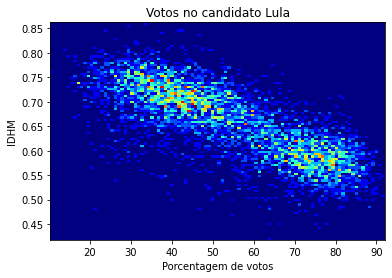

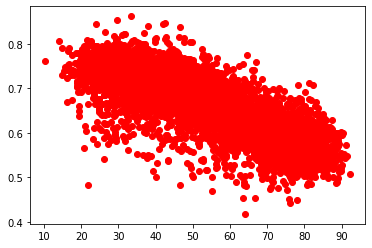

In [ ]:
#2) Criando Scatter Plots com os dados obtidos.

# Primeiramente, analisando graficamente os dados do candidato Lula:
x = votos_idhm_lula['PCT_VOTOS']
y = votos_idhm_lula['IDHM']

plt.title('Votos no candidato Lula')
plt.xlabel('Porcentagem de votos')
plt.ylabel('IDHM')


plt.hist2d(x, y, bins = (100, 100), cmap=plt.cm.jet)
plt.show()

plt.scatter(x, y, color = 'r')


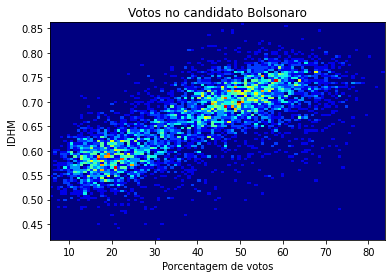

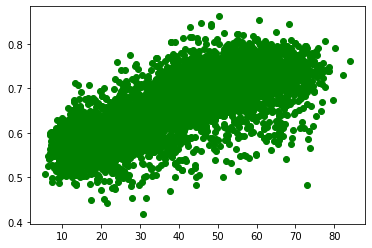

In [ ]:
#Analisando graficamente os dados do candidato Jair Bolsonaro:
x = votos_idhm_bolsonaro['PCT_VOTOS']
y = votos_idhm_bolsonaro['IDHM']

plt.title('Votos no candidato Bolsonaro')
plt.xlabel('Porcentagem de votos')
plt.ylabel('IDHM')
plt.hist2d(x, y, bins = (100, 100), cmap=plt.cm.jet)
plt.show()

plt.scatter(x, y, color= 'g')
plt.show()


Com esses dados podemos notar algo importante. O candidato Lula teve mais votos em cidades com menor IDHM, enquanto o candidato
Bolsonaro obteve maior quantidade de votos em municipios com maior IDHM.

In [ ]:
# 3) Analisando os votos de acordo com a faixa de IDH dos municípios

  #LULA:

#Classificação do IDHM
#Criando uma nova coluna com as faixas de IDHM

faixas = [0, 0.500, 0.600, 0.700, 0.800, 1]
nome_faixas = ['muito baixo', 'baixo', 'medio', 'alto', 'muito alto']
votos_idhm_lula['FAIXA_IDHM'] = pd.cut(votos_idhm_lula['IDHM'], faixas, labels= nome_faixas)


#Criando um DataFrame mais "enxuto" com os dados relevantes;
#Transformando a soma dos votos que estão no formato series para int;
#Porcentagem;
#Ordenação e porcentagem.

votos_idhm_lula2 = votos_idhm_lula.groupby('FAIXA_IDHM')[['QT_VOTOS_NOMINAIS_VALIDOS']].sum()
votos_idhm_lula2.rename(columns={'QT_VOTOS_NOMINAIS_VALIDOS' : 'PCT_VOTOS_POR_FAIXA_IDH_LULA'}, inplace = True)
total = int(votos_idhm_lula2.sum())
votos_idhm_lula2 = votos_idhm_lula2/total
votos_idhm_lula2.sort_values('PCT_VOTOS_POR_FAIXA_IDH_LULA', ascending = False) * 100





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PCT_VOTOS_POR_FAIXA_IDH_LULA
FAIXA_IDHM,
alto,44.247305
medio,25.939886
baixo,16.318797
muito alto,13.110619
muito baixo,0.383394


In [ ]:
# 3)Da mesma maneira, analisando a quantidade de votos para o candidato Jair Bolsonaro:

votos_idhm_bolsonaro['FAIXA_IDHM'] = pd.cut(votos_idhm_bolsonaro['IDHM'], faixas, labels= nome_faixas)

votos_idhm_bolsonaro2 = votos_idhm_bolsonaro.groupby('FAIXA_IDHM')[['QT_VOTOS_NOMINAIS_VALIDOS']].sum()
votos_idhm_bolsonaro2.rename(columns={'QT_VOTOS_NOMINAIS_VALIDOS' : 'PCT_VOTOS_POR_FAIXA_IDH_BOLSONARO'}, inplace = True)
total = int(votos_idhm_bolsonaro2.sum())
votos_idhm_bolsonaro2 = votos_idhm_bolsonaro2/total
votos_idhm_bolsonaro2.sort_values('PCT_VOTOS_POR_FAIXA_IDH_BOLSONARO', ascending = False) * 100



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PCT_VOTOS_POR_FAIXA_IDH_BOLSONARO
FAIXA_IDHM,
alto,59.894141
medio,17.985032
muito alto,16.172725
baixo,5.796467
muito baixo,0.151635


In [ ]:
# 4) Analisando os votos de acordo com a faixa de população dos municípios

  #LULA:

#Classificação da população
#Criando uma nova coluna com as faixas de população

faixas2 = [0, 50000, 100000, 250000, 500000, 1000000, 15000000]
nome_faixas2 = ['0 - 50 mil hab', '50 mil - 100 mil hab', '100 mil - 250 mil hab', '250 mil - 500 mil hab', '500 mil - 1 milhão hab', '1 milhão - 15 milhões hab']
votos_idhm_lula['FAIXA_POPULACAO'] = pd.cut(votos_idhm_lula['population'], faixas2, labels= nome_faixas2)

#Criando um DataFrame mais "enxuto" com os dados relevantes;
#Transformando a soma dos votos que estão no formato series para int;
#Porcentagem;
#Ordenação e porcentagem.


votos_idhm_lula3 = votos_idhm_lula.groupby('FAIXA_POPULACAO')[['QT_VOTOS_NOMINAIS_VALIDOS']].sum()
votos_idhm_lula3.rename(columns={'QT_VOTOS_NOMINAIS_VALIDOS' : 'PCT_VOTOS_POR_FAIXA_POPULACAO_LULA'}, inplace = True)
total = int(votos_idhm_lula3.sum())
votos_idhm_lula3 = votos_idhm_lula3/total
votos_idhm_lula3.sort_values('PCT_VOTOS_POR_FAIXA_POPULACAO_LULA', ascending = False) * 100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PCT_VOTOS_POR_FAIXA_POPULACAO_LULA
FAIXA_POPULACAO,
0 - 50 mil hab,38.927291
1 milhão - 15 milhões hab,19.715535
100 mil - 250 mil hab,13.147248
50 mil - 100 mil hab,11.758799
250 mil - 500 mil hab,9.287999
500 mil - 1 milhão hab,7.163127


In [ ]:
# 4) Do mesmo modo, analisando a quantidade de votos para o candidato Jair Bolsonaro:

faixas2 = [0, 50000, 100000, 250000, 500000, 1000000, 15000000]
nome_faixas2 = ['0 - 50 mil hab', '50 mil - 100 mil hab', '100 mil - 250 mil hab', '250 mil - 500 mil hab', '500 mil - 1 milhão hab', '1 milhão - 15 milhões hab']
votos_idhm_bolsonaro['FAIXA_POPULACAO'] = pd.cut(votos_idhm_bolsonaro['population'], faixas2, labels= nome_faixas2)

votos_idhm_bolsonaro3 = votos_idhm_bolsonaro.groupby('FAIXA_POPULACAO')[['QT_VOTOS_NOMINAIS_VALIDOS']].sum()
votos_idhm_bolsonaro3.rename(columns={'QT_VOTOS_NOMINAIS_VALIDOS' : 'PCT_VOTOS_POR_FAIXA_POPULACAO_BOLSONARO'}, inplace = True)
total = int(votos_idhm_bolsonaro3.sum())
votos_idhm_bolsonaro3 = votos_idhm_bolsonaro3/total
votos_idhm_bolsonaro3.sort_values('PCT_VOTOS_POR_FAIXA_POPULACAO_BOLSONARO', ascending = False) * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PCT_VOTOS_POR_FAIXA_POPULACAO_BOLSONARO
FAIXA_POPULACAO,
0 - 50 mil hab,30.292652
1 milhão - 15 milhões hab,20.518206
100 mil - 250 mil hab,16.148149
250 mil - 500 mil hab,12.650042
50 mil - 100 mil hab,11.560555
500 mil - 1 milhão hab,8.830395
